**EVALUACIÓN DEL CURSO**

**Instrucciones:**

+ Leer el dataset de nombre “prueba_curso_geopython”.
+ Visualizar la variable en el plano, con respectivas etiquetas y mapa de colores.
+ Obtener media, mediana, moda, varianza, desviación estándar, coeficiente de variación, factor de asimetría y curtosis de la variable de interés.
+ Gráfico de derivas [x-variable], [y-variable].
+ Graficar histograma simple, acumulado, cajas y bigotes.
+ Obtener variograma (parámetros determinados de forma independiente por el estudiante) – [PyKrige].
+ Crear grilla referente a los limites del modelo con celdas de tamaño seleccionadas por el estudiante.
+ Generar una estimación mediante Kriging Ordinario, obteniendo además varianza de estimación.
+ En una figura (matplotlib), crear 3 gráficos [muestras, estimación, varianza de estimación].

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')

%matplotlib inline

In [2]:
# Lectura dataset .txt
df = pd.read_csv('/home/jcsarab/Documentos/Cusro_Geostadistica_Python/dataset_curso/prueba_curso_geopython.txt',
                 sep="\t", skiprows=9, header=None)
# df.columns[] para normbrar columnas
df.columns = ['ID Sondaje','Coordenada Este [X]','Coordenada Norte [Y]','Elevación [Z]',
              'N° de muestra','Variable [Cu en %]']

In [3]:
df.shape

(1080, 6)

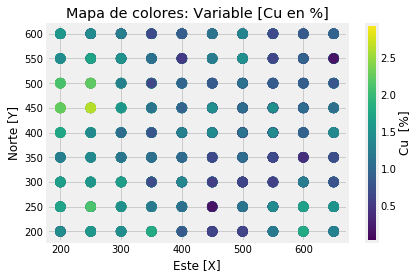

In [4]:
# Visualización en el plano con etiquetas y mapa de colores

x = np.array(df['Coordenada Este [X]'])
y = np.array(df['Coordenada Norte [Y]'])
cu = np.array(df['Variable [Cu en %]'])

marker_size = 100
plt.scatter(x, y, marker_size, cu, cmap=plt.cm.viridis)
plt.xlabel('Este [X]')
plt.ylabel('Norte [Y]')
plt.title('Mapa de colores: Variable [Cu en %]')
cbar = plt.colorbar()
cbar.set_label('Cu  [%]', labelpad = +1)
plt.grid(True)

plt.show()

In [5]:
#  Media, mediana, moda, varianza, desviación estándar, coeficiente de variación, factor de asimetría y Kurtosis.

df1 = df['Variable [Cu en %]']

u = round(df1.mean(),3)
med = round(df1.median(),3)
var = round(df1.var(),3)
sd = round(df1.std(),3)
cv = round((sd/u),3)
asm = round(df1.skew(),3)
kurt = round(df1.kurt(),3)
mod = df1.mode()


print('Estadisticos descriptivos de la variable de interés')

print('MEDIA:                     ',u)
print('MEDIANA:                   ',med)
print('VARIANZA:                  ',var)
print('DESVEST:                   ',sd)
print('COEFICIENTE DE VARIACIÓN:  ',cv)
print('FACTOR DE ASIMETRIA:       ',asm)
print('KURTOSIS:                  ',kurt)

print('MODA:')
print(mod)

Estadisticos descriptivos de la variable de interés
MEDIA:                      1.111
MEDIANA:                    1.061
VARIANZA:                   0.238
DESVEST:                    0.488
COEFICIENTE DE VARIACIÓN:   0.439
FACTOR DE ASIMETRIA:        0.533
KURTOSIS:                   0.258
MODA:
0    0.799841
1    1.299070
dtype: float64


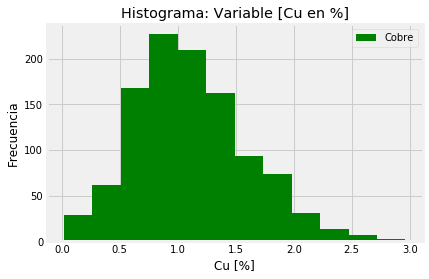

In [6]:
# Histograma de frecuencias

plt.hist(df['Variable [Cu en %]'], bins='sturges', color='green', histtype='stepfilled',
         range=[df1.min(),df1.max()], orientation='vertical',label='Cobre')

plt.xlabel("Cu [%]")
plt.ylabel("Frecuencia")
plt.title("Histograma: Variable [Cu en %]")
plt.legend()
plt.grid(True)

plt.show()

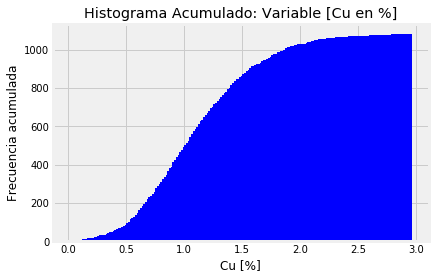

In [7]:
# Histograma de frecuencias Acumulado

plt.hist(df['Variable [Cu en %]'], bins=200, color='Blue', histtype='stepfilled', cumulative = True)
plt.xlabel("Cu [%]")
plt.ylabel("Frecuencia acumulada")
plt.title("Histograma Acumulado: Variable [Cu en %]")
plt.grid(True)

plt.show()

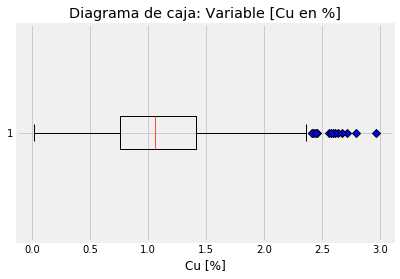

In [8]:
# Diagrama de Caja

diamantes = dict(markerfacecolor='B', marker='D')

plt.boxplot(df['Variable [Cu en %]'], vert= False, flierprops=diamantes, showfliers=True)
plt.xlabel("Cu [%]")
plt.title("Diagrama de caja: Variable [Cu en %]")
plt.grid(True)

plt.show()

In [9]:
df.describe()

,ID Sondaje,Coordenada Este [X],Coordenada Norte [Y],Elevación [Z],N° de muestra,Variable [Cu en %]
count,1080.000000,1080.0000,1080.000000,1080.000000,1080.00000,1080.000000
mean,45.500000,425.0000,400.000000,102.500000,540.50000,1.111156
std,25.991194,143.6806,129.159255,17.268259,311.91345,0.487569
min,1.000000,200.0000,200.000000,75.000000,1.00000,0.016985
25%,23.000000,300.0000,300.000000,88.750000,270.75000,0.760585
50%,45.500000,425.0000,400.000000,102.500000,540.50000,1.061180
75%,68.000000,550.0000,500.000000,116.250000,810.25000,1.411830
max,90.000000,650.0000,600.000000,130.000000,1080.00000,2.963290


In [10]:
# Matriz Este - Cu ( Se analizará la variabilidad de la ley de Cu en intervalos de 50 metros)

df_x = pd.DataFrame({'From': list(range(200,601,50)), 'To': list(range(250,651,50)), 'Cu': np.nan})

a = (df[(df['Coordenada Este [X]']>=200) & (df['Coordenada Este [X]']<250)]).mean()
ax = a['Variable [Cu en %]']
b = (df[(df['Coordenada Este [X]']>=250) & (df['Coordenada Este [X]']<300)]).mean()
bx = b['Variable [Cu en %]']
c = (df[(df['Coordenada Este [X]']>=300) & (df['Coordenada Este [X]']<350)]).mean()
cx = c['Variable [Cu en %]']
d = (df[(df['Coordenada Este [X]']>=350) & (df['Coordenada Este [X]']<400)]).mean()
dx = d['Variable [Cu en %]']
e = (df[(df['Coordenada Este [X]']>=400) & (df['Coordenada Este [X]']<450)]).mean()
ex = e['Variable [Cu en %]']
f = (df[(df['Coordenada Este [X]']>=450) & (df['Coordenada Este [X]']<500)]).mean()
fx = f['Variable [Cu en %]']
g = (df[(df['Coordenada Este [X]']>=500) & (df['Coordenada Este [X]']<550)]).mean()
gx = g['Variable [Cu en %]']
h = (df[(df['Coordenada Este [X]']>=550) & (df['Coordenada Este [X]']<600)]).mean()
hx = h['Variable [Cu en %]']
i = (df[(df['Coordenada Este [X]']>=600) & (df['Coordenada Este [X]']<650)]).mean()
ix = i['Variable [Cu en %]']

df_x['Cu'] = [ax,bx,cx,dx,ex,fx,gx,hx,ix]
df_x['promxy'] = df_x['To'] - 25 

# Matriz Norte - Cu ( Intervalos de 50 metros)

df_y = pd.DataFrame({'From': list(range(200,551,50)), 'To': list(range(250,601,50)), 'Cu': np.nan})

j = (df[(df['Coordenada Norte [Y]']>=200) & (df['Coordenada Norte [Y]']<250)]).mean()
jy = j['Variable [Cu en %]']
k = (df[(df['Coordenada Norte [Y]']>=250) & (df['Coordenada Norte [Y]']<300)]).mean()
ky = k['Variable [Cu en %]']
l = (df[(df['Coordenada Norte [Y]']>=300) & (df['Coordenada Norte [Y]']<350)]).mean()
ly = l['Variable [Cu en %]']
m = (df[(df['Coordenada Norte [Y]']>=350) & (df['Coordenada Norte [Y]']<400)]).mean()
my = m['Variable [Cu en %]']
n = (df[(df['Coordenada Norte [Y]']>=400) & (df['Coordenada Norte [Y]']<450)]).mean()
ny = n['Variable [Cu en %]']
o = (df[(df['Coordenada Norte [Y]']>=450) & (df['Coordenada Norte [Y]']<500)]).mean()
oy = o['Variable [Cu en %]']
p = (df[(df['Coordenada Norte [Y]']>=500) & (df['Coordenada Norte [Y]']<550)]).mean()
py = p['Variable [Cu en %]']
q = (df[(df['Coordenada Norte [Y]']>=550) & (df['Coordenada Norte [Y]']<600)]).mean()
qy = q['Variable [Cu en %]']

df_y['Cu'] = [jy,ky,ly,my,ny,oy,py,qy]
df_y['promxy'] = df_y['To'] - 25

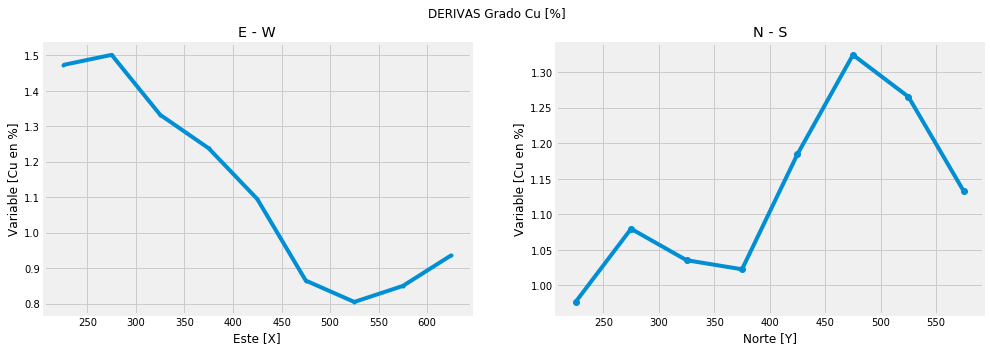

In [11]:
# Graficos de derivas con ventanas de 50 metros
# Para ver como se comporta la variable cada 50 metros

figura = plt.figure(figsize=(15,5))

figura.suptitle('DERIVAS Grado Cu [%]' )

plot1 = figura.add_subplot(121)
plt.plot(df_x['promxy'], df_x['Cu'], '.-')
plt.xlabel('Este [X]')
plt.ylabel('Variable [Cu en %]')
plt.title('E - W')
plt.grid(True)

plot2 = figura.add_subplot(122)
plt.plot(df_y['promxy'], df_y['Cu'], 'o-')
plt.xlabel('Norte [Y]')
plt.ylabel('Variable [Cu en %]')
plt.title('N - S')
plt.grid(True)

plt.show()

In [12]:
# Creación del Variograma

# Modelo Esférico

import pykrige 
import pykrige.kriging_tools as kt 
from pykrige.ok import OrdinaryKriging 

In [13]:
# Lectura de las columnas necesarias para crear el variograma y estimación Kriging.

df2 = pd.read_csv('/home/jcsarab/Documentos/Cusro_Geostadistica_Python/dataset_curso/prueba_curso_geopython.txt',
                  sep = "\t", usecols=[1,2,5],
                  names = ['Coordenada Este [X]','Coordenada Norte [Y]','Variable [Cu en %]'],
                  skiprows=9)

In [14]:
# Conversión de variables en arrays. Numpy

x = np.array([df['Coordenada Este [X]']])
y = np.array([df['Coordenada Norte [Y]']])
cu = np.array([df['Variable [Cu en %]']])

In [15]:
round(df2['Variable [Cu en %]'].var(),3) # Sill para el variograma de Cu 

0.238

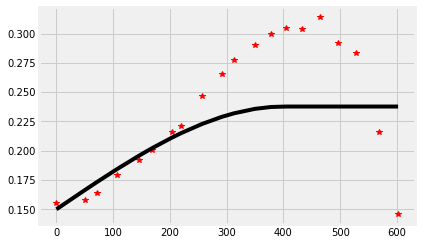

In [16]:
# Estimación mediante Kriging Ordinario

OK = OrdinaryKriging(x,y,cu, variogram_model='spherical', nlags=20, 
                     variogram_parameters= {'sill': df2['Variable [Cu en %]'].var(),
                                            'range':400, 'nugget': 0.15 }, enable_plotting=True,
                     coordinates_type='euclidean')

In [17]:
# Cuadricula con talmaño igual al set equivalente a las coordenadas dadas

gridx = np.linspace(200, 650,num=45, endpoint=False) 
gridy = np.linspace(200, 600,num=40, endpoint=False) 

In [18]:
print(gridx)

[200. 210. 220. 230. 240. 250. 260. 270. 280. 290. 300. 310. 320. 330.
 340. 350. 360. 370. 380. 390. 400. 410. 420. 430. 440. 450. 460. 470.
 480. 490. 500. 510. 520. 530. 540. 550. 560. 570. 580. 590. 600. 610.
 620. 630. 640.]


In [19]:
print(gridy)

[200. 210. 220. 230. 240. 250. 260. 270. 280. 290. 300. 310. 320. 330.
 340. 350. 360. 370. 380. 390. 400. 410. 420. 430. 440. 450. 460. 470.
 480. 490. 500. 510. 520. 530. 540. 550. 560. 570. 580. 590.]


In [20]:
# Se obtiene asi, "ss" Varianza de estimación y "z" Krigin Ordinario.

z, ss = OK.execute('grid', gridx, gridy)

In [21]:
print(ss)

[[-0.638955266794197 0.16108303202989974 0.162375588006463 ...
  0.16222250963054413 0.16237558800648333 0.16108303202992555]
 [0.16108861351891432 0.16128388323793993 0.16198052038755653 ...
  0.16185570183468537 0.16198052038758556 0.16128388323797702]
 [0.16238633204178501 0.16198515598590324 0.16215008372953169 ...
  0.16203385853945654 0.16215008372956657 0.16198515598593952]
 ...
 [0.16223499571316663 0.1618620512952647 0.16203559348758823 ...
  0.16193429049999256 0.162035593487647 0.1618620512953034]
 [0.16238633204178354 0.16198515598591723 0.16215008372952264 ...
  0.16203385853948074 0.1621500837295721 0.16198515598592958]
 [0.16108861351892617 0.1612838832379729 0.16198052038757377 ...
  0.16185570183472264 0.1619805203876079 0.16128388323798704]]


In [22]:
kt.write_asc_grid(gridx, gridy, z, filename="krigingO.asc") # Matriz Kriging Ordinario guardado como ASCII

In [23]:
kt.write_asc_grid(gridx, gridy, ss, filename="krigingO_var.asc") # Matriz Varianza de estimación guardado como ASCII

In [24]:
# Lectura archivo ASCII

origen = '/home/jcsarab/Documentos/Cusro_Geostadistica_Python/dataset_curso/'

asc = pd.read_csv(origen + 'krigingO.asc',header = None, skiprows=7, sep= '\s+')
asc2 = pd.read_csv(origen + 'krigingO_var.asc',header = None, skiprows=7, sep= '\s+')

# modifica el valore negativo en el array, debido a que la varianza de estimacíon no puede ser negativa
asc2 = asc2.clip(lower = 0.16) 

In [25]:
cu2 = np.array(asc) # creación de la matriz ndarray (Numpy)

cu3 = np.array(asc2) # creación de la matriz ndarray (Numpy)

In [26]:
asc.head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,1.32,1.32,1.32,1.33,1.33,1.32,1.31,1.28,1.25,1.22,...,0.80,0.80,0.81,0.81,0.82,0.82,0.83,0.84,0.85,0.86
1,1.37,1.36,1.36,1.36,1.36,1.35,1.33,1.31,1.28,1.25,...,0.81,0.81,0.82,0.82,0.83,0.84,0.85,0.86,0.87,0.88
2,1.41,1.41,1.41,1.40,1.39,1.38,1.36,1.34,1.31,1.28,...,0.82,0.83,0.83,0.84,0.85,0.86,0.87,0.88,0.90,0.91
3,1.46,1.46,1.45,1.44,1.43,1.41,1.39,1.37,1.34,1.31,...,0.84,0.84,0.85,0.86,0.87,0.88,0.89,0.91,0.92,0.94
4,1.51,1.51,1.50,1.49,1.47,1.45,1.43,1.40,1.38,1.35,...,0.85,0.85,0.86,0.87,0.89,0.90,0.91,0.93,0.95,0.97


In [27]:
asc2.tail()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
40,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,...,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16
41,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,...,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16
42,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,...,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16
43,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,...,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16
44,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,...,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16,0.16


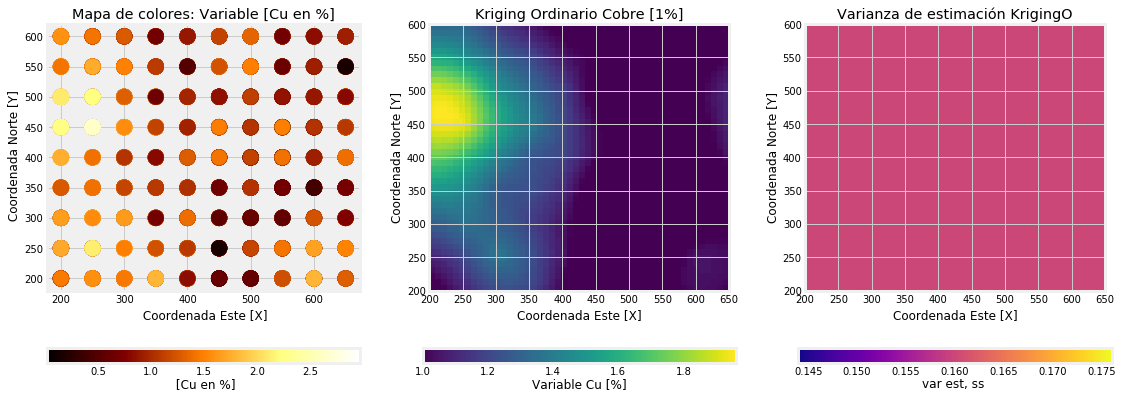

In [28]:
# Visualización:

#Gráfico Muestras
#Gráfico Estimacion KrigingO
#Gráfico Varianza de Estimación

fig = plt.figure(figsize=(17,7))

plot1 = fig.add_subplot(131)

marker_size = 250
c = plt.scatter(x, y, marker_size, cu, cmap=plt.cm.afmhot)
plt.xlabel(' Coordenada Este [X]',)
plt.ylabel(' Coordenada Norte [Y]' )
plt.title('Mapa de colores: Variable [Cu en %]', )
cbar = fig.colorbar(c,orientation='horizontal' )
cbar.set_label(' [Cu en %]', labelpad = +1)
plt.grid(True)

plot2 = fig.add_subplot(132)

a = plt.imshow(cu2, cmap=plt.cm.viridis, interpolation='nearest', extent=[200,650,200,600], vmin = 1)
cbar = fig.colorbar(a,orientation='horizontal')
cbar.set_label("Variable Cu [%]", labelpad=+1)
plt.xlabel('Coordenada Este [X]')
plt.ylabel('Coordenada Norte [Y]')
plt.title('Kriging Ordinario Cobre [1%]')
plt.grid(True)

plot3 = fig.add_subplot(133)

b = plt.imshow(cu3, cmap=plt.cm.plasma,  extent=[200,650,200,600])
cbar = fig.colorbar(b, orientation = 'horizontal')
cbar.set_label("var est, ss ", labelpad = +1)
plt.xlabel('Coordenada Este [X]')
plt.ylabel('Coordenada Norte [Y]')
plt.title('Varianza de estimación KrigingO')
plt.grid(True)

plt.show()